In [1]:
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
# collection of machine learning algorithms



from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
import torch

In [3]:
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  
y = torch.sin(x) + 0.2*torch.rand(x.size())     

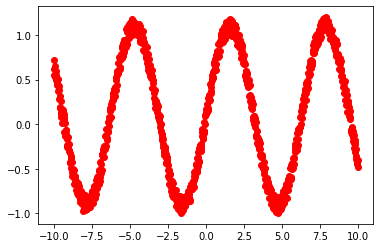

In [4]:
plt.scatter(x=x, y=y, color = "red");
plt.show()

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,50)
        self.fc3 = nn.Linear(50,1)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01 )

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [8]:
x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))
x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [12]:
epoch = 500
model.train()
train_loss = 1000000

batch_size = 64
lossTrainList = []
epochList = []
lossTestList = []


for epochNum in range(epoch):

    optimizer.zero_grad()
    y_pred = model(x_var_train)
    loss = criterion(y_pred, y_var_train)
  
    print("Epoch {}: train loss: {}".format(epochNum, loss.item()))
    
    loss.backward()
    optimizer.step()
    
    lossVal = loss.item()*1
    
    if train_loss > lossVal:
    
        torch.save(model.state_dict(), "model.pt")
    
        lossTrainList.append(lossVal)
        epochList.append(epochNum)
        train_loss = lossVal

Epoch 0: train loss: 0.10043683648109436
Epoch 1: train loss: 0.09912094473838806
Epoch 2: train loss: 0.09754645824432373
Epoch 3: train loss: 0.09804054349660873
Epoch 4: train loss: 0.09920855611562729
Epoch 5: train loss: 0.09885452687740326
Epoch 6: train loss: 0.09766855090856552
Epoch 7: train loss: 0.097631074488163
Epoch 8: train loss: 0.09846233576536179
Epoch 9: train loss: 0.09847833216190338
Epoch 10: train loss: 0.09770317375659943
Epoch 11: train loss: 0.09747929126024246
Epoch 12: train loss: 0.097993865609169
Epoch 13: train loss: 0.09816194325685501
Epoch 14: train loss: 0.09768760949373245
Epoch 15: train loss: 0.09742359817028046
Epoch 16: train loss: 0.09771721810102463
Epoch 17: train loss: 0.09791847318410873
Epoch 18: train loss: 0.09766150265932083
Epoch 19: train loss: 0.09740836918354034
Epoch 20: train loss: 0.09753002971410751
Epoch 21: train loss: 0.09771398454904556
Epoch 22: train loss: 0.0976099744439125
Epoch 23: train loss: 0.09741182625293732
Epoch 2

Epoch 193: train loss: 0.09705521911382675
Epoch 194: train loss: 0.09705128520727158
Epoch 195: train loss: 0.09704984724521637
Epoch 196: train loss: 0.09705016016960144
Epoch 197: train loss: 0.09705042093992233
Epoch 198: train loss: 0.0970487967133522
Epoch 199: train loss: 0.09704609960317612


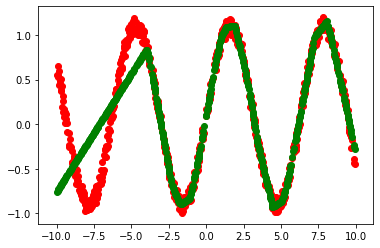

In [13]:
plt.scatter(x=x_var_train.detach().numpy(), y=y_train.detach().numpy(), color = "red");
plt.scatter(x=x_var_train.detach().numpy(), y=y_pred.detach().numpy(), color = "green")
plt.show()

In [11]:
y_pred

tensor([[ 0.9042],
        [-0.9569],
        [-0.4339],
        [-0.2405],
        [-0.4980],
        [-0.8780],
        [-0.1133],
        [ 0.1870],
        [-0.8971],
        [-0.9231],
        [ 0.3533],
        [-0.3476],
        [-0.1454],
        [-0.7117],
        [ 0.0630],
        [ 0.2051],
        [-0.0973],
        [-0.5300],
        [ 0.4797],
        [ 0.7616],
        [ 0.5117],
        [ 1.0512],
        [-0.1905],
        [ 0.2573],
        [ 0.6419],
        [-0.3465],
        [ 0.4302],
        [ 1.0806],
        [-0.0462],
        [-0.0387],
        [-0.2859],
        [-0.6850],
        [ 0.2179],
        [-0.8385],
        [ 0.1863],
        [ 0.3247],
        [ 0.2024],
        [ 0.0550],
        [ 0.6415],
        [ 0.5171],
        [ 0.8885],
        [ 0.1324],
        [ 0.2232],
        [ 0.6003],
        [-0.0653],
        [ 0.8186],
        [-0.9825],
        [-0.2287],
        [ 0.5544],
        [-0.3591],
        [ 0.4892],
        [ 0.0363],
        [ 0.